# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = [] #this is where we pull the coordinates
cities = [] #we are using the coordinates to loop to the list of cities

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#the output changes everytime we have the np.radom unit form, it is randomizes the results so it will change

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#this is the link we use to pull weather information, after ? we will hava parameters
url = 'http://api.openweathermap.org/data/2.5/weather?' 

#build query URL
#"appid" is the application id, this is our API after the url 
#"&q=" is the query - extensions of the URL help determine specific content or action based on the data being delivered
#in this case our query is the city
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url = f"{url}appid={weather_api_key}&units=imperial&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f2deb80b0bea75908cebab9ed8582510&units=imperial&q=


In [4]:
#get weather data
#we turn it into a json format
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [5]:
#create a for loop that will through request made
#append the values trying to retrived from said list

#creating empty lists for every item in our query 
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = [] 
country = []

x = 0

print('Beginning Data Retrieval')
print("-"*25)
for i in cities:
    try:
        weather_response = requests.get(query_url + i).json() #each city that is in my cities list
        x = x + 1
        print(f'Processing Record {x} | {i}')
        city_name.append(weather_response["name"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        temperature.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
    except KeyError:
        print("City not found")
    

Beginning Data Retrieval
-------------------------
Processing Record 1 | touros
Processing Record 2 | bluff
Processing Record 3 | lolua
City not found
Processing Record 4 | kysyl-syr
Processing Record 5 | ngunguru
Processing Record 6 | yanam
Processing Record 7 | castro
Processing Record 8 | miraflores
Processing Record 9 | kropotkin
Processing Record 10 | yarim
Processing Record 11 | busselton
Processing Record 12 | herat
Processing Record 13 | rikitea
Processing Record 14 | abapo
Processing Record 15 | hermanus
Processing Record 16 | dikson
Processing Record 17 | yellowknife
Processing Record 18 | honningsvag
Processing Record 19 | cape town
Processing Record 20 | ushuaia
Processing Record 21 | giyon
Processing Record 22 | atuona
Processing Record 23 | clarence town
Processing Record 24 | diplo
Processing Record 25 | kamien pomorski
Processing Record 26 | uray
Processing Record 27 | nanortalik
Processing Record 28 | hawalli
Processing Record 29 | puerto ayora
Processing Record 30 | s

Processing Record 242 | sakakah
Processing Record 243 | kanniyakumari
Processing Record 244 | codrington
Processing Record 245 | west helena
Processing Record 246 | ilulissat
Processing Record 247 | port hedland
Processing Record 248 | balabac
Processing Record 249 | padrauna
Processing Record 250 | makat
Processing Record 251 | ongandjera
Processing Record 252 | tasiilaq
Processing Record 253 | coquimbo
Processing Record 254 | comodoro rivadavia
Processing Record 255 | srednekolymsk
Processing Record 256 | ribeira grande
Processing Record 257 | dekar
Processing Record 258 | pochutla
Processing Record 259 | viedma
Processing Record 260 | malwan
City not found
Processing Record 261 | falealupo
City not found
Processing Record 262 | puerto leguizamo
Processing Record 263 | lompoc
Processing Record 264 | hakvik
City not found
Processing Record 265 | mbour
Processing Record 266 | mama
Processing Record 267 | kolobrzeg
Processing Record 268 | sorland
Processing Record 269 | upata
Processing

Processing Record 482 | houma
Processing Record 483 | tignere
Processing Record 484 | dillon
Processing Record 485 | gizo
Processing Record 486 | borogontsy
Processing Record 487 | shatrovo
Processing Record 488 | logan lake
Processing Record 489 | amahai
Processing Record 490 | jacqueville
Processing Record 491 | mareeba
Processing Record 492 | diepholz
Processing Record 493 | alzamay
Processing Record 494 | imeni poliny osipenko
Processing Record 495 | maple creek
Processing Record 496 | qasigiannguit
Processing Record 497 | karakendzha
City not found
Processing Record 498 | bathurst
Processing Record 499 | madimba
Processing Record 500 | prince george
Processing Record 501 | loei
Processing Record 502 | atar
Processing Record 503 | sonoita
Processing Record 504 | anchorage
Processing Record 505 | cosmopolis
Processing Record 506 | maragogi
Processing Record 507 | lubango
Processing Record 508 | arica
Processing Record 509 | dicabisagan
Processing Record 510 | popondetta
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#this will pull date for the date in the df, got help from classmate
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

#convert raw data to DataFrame
weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": thistime
})
weather_df.head(10)


11/23/2020


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Touros,-5.20,-35.46,77.00,88,40,6.93,BR,11/23/2020
1,Bluff,-46.60,168.33,62.01,50,89,8.01,NZ,11/23/2020
2,Kysyl-Syr,63.90,122.76,-6.32,89,93,8.43,RU,11/23/2020
3,Ngunguru,-35.62,174.50,62.01,84,100,8.99,NZ,11/23/2020
4,Yanam,16.73,82.22,76.23,71,72,10.11,IN,11/23/2020
5,Castro,-24.79,-50.01,56.66,93,0,8.12,BR,11/23/2020
6,Miraflores,19.22,-98.81,64.40,41,5,3.36,MX,11/23/2020
7,Kropotkin,45.44,40.58,34.81,86,2,8.86,RU,11/23/2020
8,Yarim,14.30,44.38,47.91,72,88,5.93,YE,11/23/2020
9,Busselton,-33.65,115.33,80.01,50,0,3.00,AU,11/23/2020


In [8]:
#export data to csv
weather_df.to_csv('weather_data_output.csv')

#visualize to confirm airport data appears
#weather_df.sort_values('weather_data_output', ascending=False)
#copied this code from class but doesn't work

In [9]:
#summary of central tendency of dataset
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph)
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,21.941152,14.516719,52.497295,75.780105,53.916230,8.065358
std,33.845329,87.588084,24.945650,18.113873,39.645589,5.797254
min,-54.800000,-175.200000,-19.160000,13.000000,0.000000,0.000000
25%,-6.220000,-58.650000,35.600000,66.000000,11.000000,3.440000
50%,29.800000,15.790000,57.200000,80.000000,66.000000,6.930000
75%,51.680000,83.980000,75.000000,90.000000,92.000000,10.830000
max,78.220000,178.420000,100.400000,100.000000,100.000000,40.260000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
list(weather_df.columns)

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed (mph)',
 'Country',
 'Date']

In [11]:
#check for cities with humidity over 100%
weather_df.loc[weather_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date


In [12]:
#check that above code works by pulling humidity under 100%
weather_df.loc[weather_df['Humidity'] < 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Touros,-5.20,-35.46,77.00,88,40,6.93,BR,11/23/2020
1,Bluff,-46.60,168.33,62.01,50,89,8.01,NZ,11/23/2020
2,Kysyl-Syr,63.90,122.76,-6.32,89,93,8.43,RU,11/23/2020
3,Ngunguru,-35.62,174.50,62.01,84,100,8.99,NZ,11/23/2020
4,Yanam,16.73,82.22,76.23,71,72,10.11,IN,11/23/2020
...,...,...,...,...,...,...,...,...,...
568,Malanje,-9.54,16.34,65.14,95,100,4.05,AO,11/23/2020
569,Yerbogachën,61.28,108.01,-0.87,90,0,5.28,RU,11/23/2020
570,Half Moon Bay,37.46,-122.43,55.99,76,1,5.82,US,11/23/2020
571,Pelym,61.01,62.00,19.94,93,93,6.96,RU,11/23/2020


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
#skipping this step as there isn't humidity over 100 per instructions


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

11/23/2020


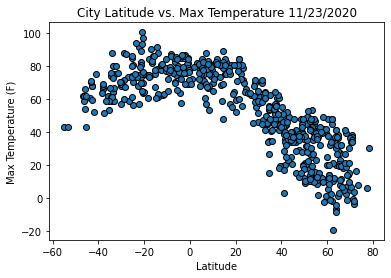

In [13]:
# displaying today's date by using datetime syntax 
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

#defining x and y axis
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')


# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Latitude_vs_Temperature.jpg')

## Latitude vs. Humidity Plot

11/23/2020


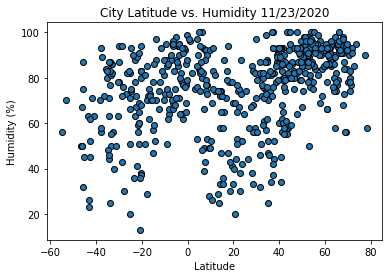

In [14]:
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

x_axis = weather_df['Lat']
y_axis = weather_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Latitude_vs_Humidity.jpg')

## Latitude vs. Cloudiness Plot

11/23/2020


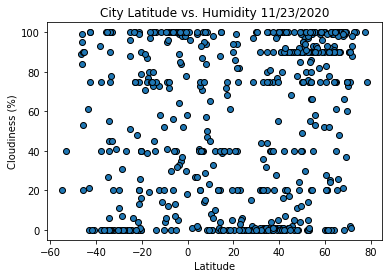

In [15]:
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

x_axis = weather_df['Lat']
y_axis = weather_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Latitude_vs_cloudiness.jpg')

## Latitude vs. Wind Speed Plot

11/23/2020


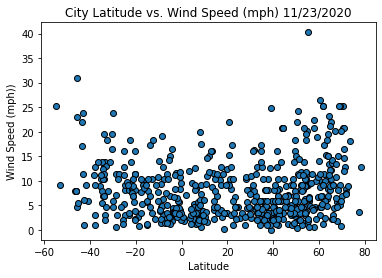

In [16]:
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)

x_axis = weather_df['Lat']
y_axis = weather_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph) ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.savefig('Latitude_vs_wind_speed.jpg')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
#create a new dataframe with northern hemisphere only
north_df = weather_df.loc[weather_df['Lat'] >= 0]
north_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date
2,Kysyl-Syr,63.90,122.76,-6.32,89,93,8.43,RU,11/23/2020
4,Yanam,16.73,82.22,76.23,71,72,10.11,IN,11/23/2020
6,Miraflores,19.22,-98.81,64.40,41,5,3.36,MX,11/23/2020
7,Kropotkin,45.44,40.58,34.81,86,2,8.86,RU,11/23/2020
8,Yarim,14.30,44.38,47.91,72,88,5.93,YE,11/23/2020
...,...,...,...,...,...,...,...,...,...
566,Marawi,8.00,124.29,81.00,77,57,5.01,PH,11/23/2020
567,Mayskiy,47.69,40.10,37.40,93,90,4.47,RU,11/23/2020
569,Yerbogachën,61.28,108.01,-0.87,90,0,5.28,RU,11/23/2020
570,Half Moon Bay,37.46,-122.43,55.99,76,1,5.82,US,11/23/2020


The r-value is -0.85


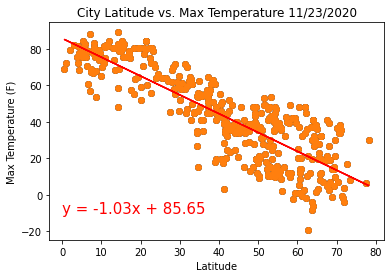

<Figure size 432x288 with 0 Axes>

In [18]:
x_axis = north_df['Lat']
y_axis = north_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_temperature.jpg')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
#create a new dataframe with southern hemisphere only
south_df = weather_df.loc[weather_df['Lat'] <= 0]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Country,Date
0,Touros,-5.20,-35.46,77.00,88,40,6.93,BR,11/23/2020
1,Bluff,-46.60,168.33,62.01,50,89,8.01,NZ,11/23/2020
3,Ngunguru,-35.62,174.50,62.01,84,100,8.99,NZ,11/23/2020
5,Castro,-24.79,-50.01,56.66,93,0,8.12,BR,11/23/2020
9,Busselton,-33.65,115.33,80.01,50,0,3.00,AU,11/23/2020
...,...,...,...,...,...,...,...,...,...
553,São Gabriel,-30.34,-54.32,70.39,63,0,16.58,BR,11/23/2020
562,Tual,-5.67,132.75,84.11,68,7,2.64,ID,11/23/2020
565,Kirakira,-10.45,161.92,84.43,70,0,5.95,SB,11/23/2020
568,Malanje,-9.54,16.34,65.14,95,100,4.05,AO,11/23/2020


The r-value is 0.54


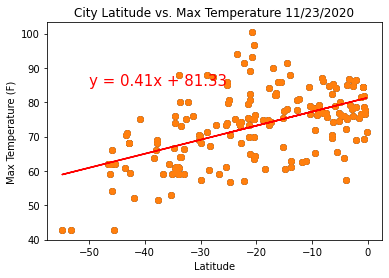

<Figure size 432x288 with 0 Axes>

In [21]:
x_axis = south_df['Lat']
y_axis = south_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Max Temperature ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_temperature.jpg')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.42


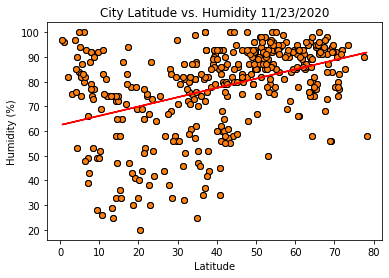

<Figure size 432x288 with 0 Axes>

In [22]:
x_axis = north_df['Lat']
y_axis = north_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_humidity.jpg')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.38


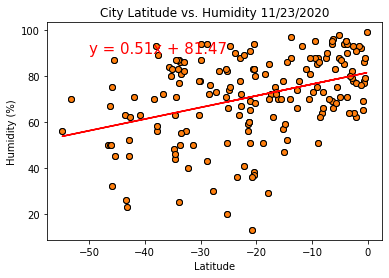

<Figure size 432x288 with 0 Axes>

In [23]:
x_axis = south_df['Lat']
y_axis = south_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#finding the correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_humidity.jpg')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.33


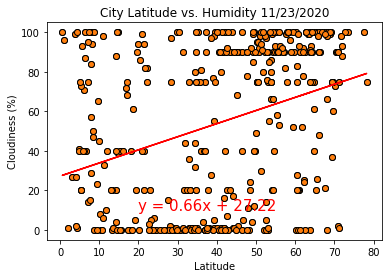

<Figure size 432x288 with 0 Axes>

In [24]:
x_axis = north_df['Lat']
y_axis = north_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_cloudiness.jpg')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.21


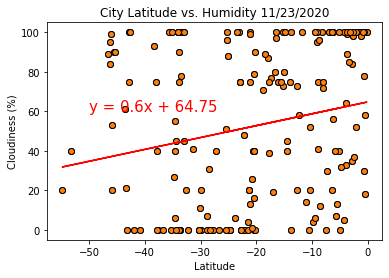

<Figure size 432x288 with 0 Axes>

In [25]:
x_axis = south_df['Lat']
y_axis = south_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Humidity ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_cloudiness.jpg')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.27


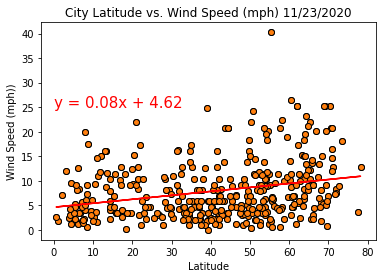

<Figure size 432x288 with 0 Axes>

In [26]:
x_axis = north_df['Lat']
y_axis = north_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph) ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_north_latitude_vs_wind_speed.jpg')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.35


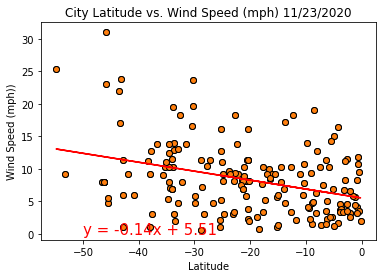

<Figure size 432x288 with 0 Axes>

In [27]:
x_axis = south_df['Lat']
y_axis = south_df['Wind Speed (mph)']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors='black')

# giving the name to the x and y label
plt.title('City Latitude vs. Wind Speed (mph) ' + thistime)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('linreg_south_latitude_vs_wind_speed.jpg')

In [ ]:
#conclusions
#northern hemisphere and temperature have a fairly strong negative correlation, meaning that the higher up north the city is, the colder it will get
#sourthern hemisphere and temrature have a weak positive correlation. The further down south a city is, temperature will increase
#correlation for northern hemisphere and humidity is weak, not much effect on humidity for cities further up north. Same can be said for southern hemisphere correlation
#correlation between latitude for coludiness and latitude for both hemispheres is weak, not much effect by city placement
#correlation between latitude and wind speed is weak for both hemispheres

